In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Building The Model Is Next
To build neural networks in PyTorch, we extend the torch.nn.Module PyTorch class. This means we need to utilize a
little bit of object oriented programming (OOP) in Python.

To build a convolutional neural network, we need to have a general understanding of how CNNs work and what components
are used to build CNNs:

    · Convolutional Filters
    · Zero Padding
    · Max Pooling
    · Learnable Parameters in CNN

# PyTorch’s torch.nn Package
To build neural networks in PyTorch, we use the torch.nn package, which is PyTorch’s neural network (nn) library.
We typically import the package like so:

    · import torch.nn as nn

PyTorch’s neural network library contains all of the typical components needed to build neural networks.

The primary component we'll need to build a neural network is a layer, and so, as we might expect, PyTorch's neural
network library contains classes that aid us in constructing layers.

# PyTorch's nn.Module Class
As we know, deep neural networks are built using multiple layers. This is what makes the network deep. Each layer in a
neural network has two primary components:

    · A transformation (code)
    · A collection of weights (data)

Like many things in life, this fact makes layers great candidates to be represented as objects using OOP.

Within the nn package, there is a class called Module, and it is the base class for all of neural network modules which
includes layers.

This means that all of the layers in PyTorch extend the nn.Module class and inherit all of PyTorch’s built-in
functionality within the nn.Module class. In OOP this concept is known as inheritance.

# PyTorch nn.Modules Have A forward() Method
When we pass a tensor to our network as input, the tensor flows forward though each layer transformation until the
tensor reaches the output layer. This process of a tensor flowing forward though the network is known as a forward pass
or forward propagation.

The tensor input is passed forward though the network.

The goal of the overall transformation is to transform or map the input to the correct prediction output class, and
during the training process, the layer weights (data) are updated in such a way that cause the mapping to adjust to
make the output closer to the correct prediction.

What this all means is that, every PyTorch nn.Module has a forward() method, and so when we are building layers and
networks, we must provide an implementation of the forward() method. The forward method is the actual transformation.

# PyTorch’s nn.functional Package
When we implement the forward() method of our nn.Module subclass, we will typically use functions from the nn.functional
package. This package provides us with many neural network operations that we can use for building layers. In fact,
many of the nn.Module layer classes use nn.functional functions to perform their operations.

The nn.functional package contains methods that subclasses of nn.Module use for implementing their forward() functions.

# Building A Neural Network In PyTorch
We now have enough information to provide an outline for building neural networks in PyTorch. The steps are as follows:

Short version:

    1.  Extend the nn.Module base class.
    2.  Define layers as class attributes.
    3.  Implement the forward() method.

More detailed version:

    1.   Create a neural network class that extends the nn.Module base class.
    2.  In the class constructor, define the network’s layers as class attributes using pre-built layers from torch.nn.
    3.  Use the network’s layer attributes as well as operations from the nn.functional API to define the network’s
    forward pass.

# Extending PyTorch’s nn.Module Class

In [3]:
class DummyNetwork:
    def __init__(self):
        self.layer = None,
    def forward(self, tensor):
        new_tensor = self.layer(tensor)
        return new_tensor

This gives us a simple network class that has a single dummy layer inside the constructor and a dummy implementation for
 the forward function.

The implementation for the forward() function takes in a tensor t and transforms it using the dummy layer. After the
tensor is transformed, the new tensor is returned.

This is a good start, but the class hasn’t yet extended the nn.Module class. To make our Network class extend nn.Module,
we must do two additional things:

    1.  Specify the nn.Module class in parentheses on line 1.
    2.  Insert a call to the super class constructor on line 3 inside the constructor.

In [4]:
class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__() # super class call . constructor from super class call
        self.layer = None
    def forward(self, t):
        new_t = self.layer(t)
        return new_t

These changes transform our simple neural network into a PyTorch neural network because we are now extending PyTorch's
nn.Module base class.

With this, we are done! Now we have a Network class that has all of the functionality of the PyTorch nn.Module class.

# Define The Network’s Layers As Class Attributes
At the moment, our Network class has a single dummy layer as an attribute. Let’s replace this now with some real layers
that come pre-built for us from PyTorch's nn library. We’re building a CNN, so the two types of layers we'll use are
linear (dense) layers and convolutional layers.

In [5]:
class BaseNetwork(nn.Module):
    def __init__(self):
        super().__init__() # call the constructor from super class!
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=12,
            kernel_size=5
        )

        self.fc1 = nn.Linear(
            in_features=12 * 4 * 4,
            out_features=120
        )
        self.fc2 = nn.Linear(
            in_features=120,
            out_features=60
        )
        self.out = nn.Linear(
            in_features=60,
            out_features=10
        )

    def forward(self, t):
        # implement the forward pass
        return t

Alright. At this point, we have a Python class called Network that extends PyTorch’s nn.Module class. Inside of our
Network class, we have five layers that are defined as attributes. We have two convolutional layers, self.conv1 and
self.conv2, and three linear layers, self.fc1, self.fc2, self.out.

We used the abbreviation fc in fc1 and fc2 because linear layers are also called fully connected layers. They also have
a third name that we may hear sometimes called dense. So linear, dense, and fully connected are all ways to refer to the
same type of layer. PyTorch uses the word linear, hence the nn.Linear class name.

We used the name out for the last linear layer because the last layer in the network is the output layer.

# PyTorch CNN Layer Parameters
Parameter vs Argument:

    · parameters are used in function definitions as place-holders, while arguments are the actual values/objects that
    are passed to the function.
    · parameters can be thought of as local variables that live inside a function

Two Types Of Parameters:

    1.  Hyperparameters
    2.  Data dependent hyperparameters

The main thing to remember about any type of parameter is that the parameter is a place-holder that will eventually
hold or have a value (of the object that is passed in a function)

When we construct a layer, we pass values for each parameter to the layer’s constructor. With our convolutional layers
have three parameters and the linear layers have two parameters.

    1.  Convolutional layers
        · in_channels
        · out_channels
        · kernel_size
    2.  Linear layers
        · in_features
        · out_features

# Hyperparameters
In general, hyperparameters are parameters whose values are chosen manually and arbitrarily.

As neural network programmers, we choose hyperparameter values mainly based on trial and error and increasingly by
utilizing values that have proven to work well in the past. For building our CNN layers, these are the parameters we
choose manually:

        · kernel_size (Conv)
        · out_channels (Conv)
        · out_features (Linear)

This means we simply choose the values for these parameters. In neural network programming, this is pretty common, and
we usually test and tune these parameters to find values that work best.


Parameter	Description

    · kernel_size	 Sets the filter size. The words kernel and filter are interchangeable.
    · out_channels	Sets the number of filters. One filter produces one output channel.
    · out_features	Sets the size of the output tensor.

On pattern that shows up quite often is that we increase our out_channels as we add additional conv layers, and after we
switch to linear layers we shrink our out_features as we filter down to our number of output classes.

All of these parameters impact our network's architecture. Specifically, these parameters directly impact the weight
tensors inside the layers.


# Data Dependent Hyperparameters
Data dependent hyperparameters are parameters whose values are dependent on data. The first two data dependent
hyperparameters that stick out are the in_channels of the first convolutional layer, and the out_features of the output
layer.

You see, the in_channels of the first convolutional layer depend on the number of color channels present inside the
images that make up the training set. Since we are dealing with grayscale images, we know that this value should be a 1.

The out_features for the output layer depend on the number of classes that are present inside our training set. Since
we have 10 classes of clothing inside the Fashion-MNIST dataset, we know that we need 10 output features.

In general, the input to one layer is the output from the previous layer, and so all of the in_channels in the conv
layers and in_features in the linear layers depend on the data coming from the previous layer.

When we switch from a conv layer to a linear layer, we have to flatten our tensor. This is why we have 12*4*4.
The twelve comes from the number of output channels in the previous layer, but why do we have the two 4s?

# Summary Of Layer Parameters
    Layer	Param name	Param value	The param value is

    · conv1	in_channels	1	the number of color channels in the input image (data dependent hyperparameter).
    · conv1	kernel_size	5	a hyperparameter.
    · conv1	out_channels	6	a hyperparameter.
    · conv2	in_channels	6	the number of out_channels in previous layer.
    · conv2	kernel_size	5	a hyperparameter.
    · conv2	out_channels	12	a hyperparameter (higher than previous conv layer).
    · fc1	in_features	12*4*4	the length of the flattened output from previous layer.
    · fc1	out_features	120	a hyperparameter.
    · fc2	in_features	120	the number of out_features of previous layer.
    · fc2	out_features	60	a hyperparameter (lower than previous linear layer).
    · out	in_features	60	the number of out_channels in previous layer.
    · out	out_features	10	the number of prediction classes (data dependent hyperparameter).

# Learnable Parameters
Learnable parameters are parameters whose values are learned during the training process.

With learnable parameters, we typically start out with a set of arbitrary values, and these values then get updated in
an iterative fashion as the network learns.

In fact, when we say that a network is learning, we specifically mean that the network is learning the appropriate
values for the learnable parameters. Appropriate values are values that minimize the loss function.

# Getting An Instance The Network

In [6]:
network = BaseNetwork()
print(network)

BaseNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


The print() function prints to the console a string representation of our network. With a sharp eye, we can notice that
the printed output here is detailing our network’s architecture listing out our network’s layers, and showing the values
that were passed to the layer constructors.

# Network String Representation
We can override Python’s default string representation using the __repr__ function. This name is short for
representation.

    def __repr__(self):
        return "lizardnet"

# Convolutional Layers
For the convolutional layers, the kernel_size argument is a Python tuple (5,5) even though we only passed the number 5
in the constructor.

    print(network)
    >>
        Network(
        (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
        (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
        (fc1): Linear(in_features=192, out_features=120, bias=True)
        (fc2): Linear(in_features=120, out_features=60, bias=True)
        (out): Linear(in_features=60, out_features=10, bias=True)
    )

This is because our filters actually have a height and width, and when we pass a single number, the code inside the
layer’s constructor assumes that we want a square filter.


The stride is an additional parameter that we could have set, but we left it out. When the stride is not specified in
the layer constructor, the layer automatically sets it to stride=(1, 1).

The stride tells the conv layer how far the filter should slide after each operation in the overall convolution. This
tuple says to slide by one unit when moving to the right and also by one unit when moving down.

# Linear Layers
For the linear layers, we have an additional parameter called bias which has a default parameter value of true. It is
possible to turn this off by setting it to false.

# Accessing The Network's Layers
In Python and many other programming languages, we access attributes and methods of objects using dot notation.

Something to notice about this that pertains directly to what we were just talking about with the string representation
of the network is that each of these pieces of code are also giving us a string representation of each layer.

In the network’s case, the network class is really just compiling all this data together to give us a single output.

In [7]:
print(network.conv2)
print(network.fc1)
print(network.out)

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
Linear(in_features=192, out_features=120, bias=True)
Linear(in_features=60, out_features=10, bias=True)


# Accessing The Layer Weights
Now that we have access to each of our layers, we can access the weights inside each layer. Let’s see this for our first
convolutional layer.

In [8]:
print(
    network.conv1.weight
)

Parameter containing:
tensor([[[[ 0.1286, -0.0964, -0.0938, -0.0088,  0.1372],
          [ 0.1176,  0.1968,  0.1176, -0.0493,  0.0252],
          [-0.0985, -0.0360,  0.1453,  0.0308,  0.0313],
          [ 0.0316, -0.0961,  0.1433,  0.0123, -0.1044],
          [-0.0978,  0.0483,  0.0139,  0.0330,  0.1033]]],


        [[[ 0.0438, -0.0298, -0.0539,  0.1358, -0.0938],
          [-0.0501, -0.1116, -0.0380,  0.0185, -0.1113],
          [-0.1996, -0.0043,  0.1479,  0.0139,  0.0021],
          [-0.0104, -0.1027,  0.1406,  0.0932,  0.0439],
          [ 0.0424, -0.1627,  0.1499, -0.1887,  0.1181]]],


        [[[-0.1045, -0.0645,  0.0957,  0.1842,  0.0730],
          [ 0.0142,  0.0451, -0.1735, -0.1145,  0.0269],
          [-0.0070, -0.0168, -0.0029,  0.0079,  0.1247],
          [ 0.1884,  0.0991, -0.1161, -0.0263, -0.0984],
          [-0.1861,  0.1013, -0.1887,  0.0015, -0.0855]]],


        [[[ 0.1077, -0.1548, -0.0075,  0.0654,  0.1730],
          [-0.1209,  0.1122, -0.1333, -0.0906, -0.0489

One thing to notice about the weight tensor output is that it says parameter containing at the top of the output. This
is because this particular tensor is a special tensor because its values or scalar components are learnable parameters
of our network.

This means that the values inside this tensor, the ones we see above, are actually learned as the network is trained.
As we train, these weight values are updated in such a way that the loss function is minimized.

# PyTorch Parameter Class
To keep track of all the weight tensors inside the network. PyTorch has a special class called Parameter. The Parameter
class extends the tensor class, and so the weight tensor inside every layer is an instance of this Parameter class.
This is why we see the Parameter containing text at the top of the string representation output.

PyTorch’s nn.Module class is basically looking for any attributes whose values are instances of the Parameter class,
and when it finds an instance of the parameter class, it keeps track of it.

# Weight Tensor Shape
The parameter values we pass to our layers directly impact our network’s weights.

For the convolutional layers, the weight values live inside the filters, and in code, the filters are actually the
weight tensors themselves.

The convolution operation inside a layer is an operation between the input channels to the layer and the filter inside
the layer. This means that what we really have is an operation between two tensors.

For the first conv layer, we have 1 color channel that should be convolved by 6 filters of size 5x5 to produce 6 output
channels. This is how we interpret the values inside our layer constructor.

In [9]:
print(network.conv1)

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))


Inside our layer though, we don’t explicitly have 6 weight tensors for each of the 6 filters.
We actually represent all 6 filters using a single weight tensor whose shape reflects or accounts for the 6 filters.

In [10]:
print(
    network.conv1.weight.shape
)

torch.Size([6, 1, 5, 5])


The second axis has a length of 1 which accounts for the single input channel, and the last two axes account for the
height and width of the filter.

The way to think about this is as if we are packaging all of our filters into a single tensor.

Now, the second conv layer has 12 filters, and instead of convolving a single input channel, there are 6 input channels
coming from the previous layer.

In [11]:
print(
    network.conv2.weight.shape
)

torch.Size([12, 6, 5, 5])


Think of this value of 6 here as giving each of the filters some depth. Instead of having a filter that convolves all of
the channels iteratively, our filter has a depth that matches the number of channels.

The two main takeaways about these convolutional layers is that our filters are represented using a single tensor and
that each filter inside the tensor also has a depth that accounts for the input channels that are being convolved.

    1.  All filters are represented using a single tensor.
    2.  Filters have depth that accounts for the input channels.

Our tensors are rank-4 tensors. The first axis represents the number of filters. The second axis represents the depth of
each filter which corresponds to the number of input channels being convolved.

The last two axes represent the height and width of each filter. We can pull out any single filter by indexing into the
weight tensor’s first axis.

    Weight tensor = [
        Number of filters (output_channel),
            Depth (input_channel),
                Height,
                     Width (kernel_size)
                     ]

This gives us a single filter that has a height and width of 5 and a depth of 6.

# Weight Matrix
With linear layers or fully connected layers, we have flattened rank-1 tensors as input and as output. The way we
transform the in_features to the out_features in a linear layer is by using a rank-2 tensor that is commonly called a
weight matrix.

This is due to the fact that the weight tensor is of rank-2 with height and width axes.

In [12]:
print(network.fc1.weight.shape)
print(network.fc2.weight.shape)
print(network.out.weight.shape)

torch.Size([120, 192])
torch.Size([60, 120])
torch.Size([10, 60])


Here we can see that each of our linear layers have a rank-2 weight tensor. The pattern that we can see here is that the
height of the weight tensor has the length of the desired output features and a width of the input features - the first
axis represents the out_features, and second axis represents the in_features. out_features from conv(n-1) layer are
in_features to conv(n) layer.

# Linear Function Represented Using A Matrix
The important thing about matrix multiplications like this is that they represent linear functions that we can use to
build up our neural network.

Specifically, the weight matrix is a linear function also called a linear map that maps a vector space of 4 dimensions
to a vector space of 3 dimensions.

When we change the weight values inside the matrix, we are actually changing this function, and this is exactly what we
want to do as we search for the function that our network is ultimately approximating.

# Using PyTorch For Matrix Multiplication
Here, we have the in_features and the weight_matrix as tensors, and we’re using the tensor method called matmul() to
perform the operation. The name matmul() as we now know is short for matrix multiplication.

    weight_matrix.matmul(in_features)
        >> tensor([30., 40., 50.])


# Accessing The Networks Parameters
The first example is the most common way, and we’ll use this to iterate over our weights when we update them during the
training process.

In [13]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


The second way is just to show how we can see the name as well. This reveals something that we won’t cover in detail,
the bias is also a learnable parameter. Each layer has a bias by default, so for each layer we have a weight tensor and
a bias tensor.

In [14]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


# How Linear Layers Work
When the input features are received by a linear layer, they are received in the form of a flattened 1-dimensional
tensor and are then multiplied by the weight matrix. This matrix multiplication produces the output features.

# Transform Using A Matrix

In [15]:
temp_in_features = torch.tensor(
    data=[1, 2, 3, 4],
    dtype=torch.float32
)

temp_weight_matrix = torch.tensor(
    data=[
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ],
    dtype=torch.float32
)

print(
    temp_weight_matrix.matmul(temp_in_features)
)

tensor([30., 40., 50.])


Here, we have created a 1-dimensional tensor called in_features. We have also created a weight matrix which of course is
a 2-dimensional tensor. Then, we've use the matmul() function to preform the matrix multiplication operation that
produces a 1-dimensional tensor.

In general, the weight matrix defines a linear function that maps a 1-dimensional tensor with four elements to a
1-dimensional tensor that has three elements. We can think of this function as a mapping from 4-dimensional Euclidean
space to 3-dimensional Euclidean space.

This is how linear layers work as well. They map an in_feature space to an out_feature space using a weight matrix.

# Transform Using A PyTorch Linear Layer
Let's see how to create a PyTorch linear layer that will do this same operation.

In [16]:
temp_fc = nn.Linear(
    in_features=4,
    out_features=3,
    bias=False
)

Here, we have it. We've defined a linear layer that accepts 4 in features and transforms these into 3 out features, so
we go from 4-dimensional space to 3-dimensional space. We know that a weight matrix is used to preform this operation,
but where is the weight matrix in this example?

We'll the weight matrix is lives inside the PyTorch LinearLayer class and is created by PyTorch. The PyTorch LinearLayer
class uses the numbers 4 and 3 that are passed to the constructor to create a 3 x 4 weight matrix.

In [17]:
print(temp_fc(temp_in_features))

tensor([-2.4422, -1.2583,  0.6285], grad_fn=<SqueezeBackward3>)


PyTorch creates a weight matrix and initializes it with random values. This means that the linear functions from the two
examples are different, so we are using different function to produce these outputs.

Remember the values inside the weight matrix define the linear function. This demonstrates how the network's mapping
changes as the weights are updated during the training process.

Let's explicitly set the weight matrix of the linear layer to be the same as the one we used in our other example.

In [18]:
temp_fc.weight = nn.Parameter(temp_weight_matrix)

PyTorch module weights need to be parameters. This is why we wrap the weight matrix tensor inside a parameter class
instance.

In [19]:
print(temp_fc(temp_in_features))

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)


The output will not be exact because the linear layer is adding a bias tensor to the output. Watch what happens when we
turn the bias off. We do this by passing a False flag to the constructor.

The results are now the same for both linear functions.

# Mathematical Notation Of The Linear Transformation
Sometimes we'll see linear layer operation referred to as

    y = Ax + b

    Variable	Definition
    · A  Weight matrix tensor
    · x  Input tensor
    · b  Bias tensor
    · y  Output tensor

We'll note that this is similar to the equation for a line y = mx + b.

# Callable Layers And Neural Networks
We pointed out before how it was kind of strange that we called the layer object instance as if it were a function.

In [20]:
print(
    temp_fc(temp_in_features)
    # to see the output, simply call the object instance as a function, passing in_features as parameter.async
    # the output is a result of multiplication of the flattend 1d input tensor and the weight matrix.
)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)


What makes this possible is that PyTorch module classes implement another special Python function called __call__().
If a class implements the __call__() method, the special call method will be invoked anytime the object instance is
called.

This fact is an important PyTorch concept because of the way the __call__() method interacts with the forward() method for our layers and networks.

Instead of calling the forward() method directly, we call the object instance. After the object instance is called, the
__call__() method is invoked under the hood, and the __call__() in turn invokes the forward() method. This applies to
all PyTorch neural network modules, namely, networks and layers.

# CNN Forward Pass Implementation
Use the network's layer attributes as well nn.functional API operations to define the network's forward pass.

# Implementing The forward() Method
Input Layer #1

    The input layer of any neural network is determined by the input data. For example, if our input tensor contains
    three elements, our network would have three nodes contained in its input layer.

    For this reason, we can think of the input layer as the identity transformation.
    Mathematically, this is the function f(x) = x

    We give any x as the input, and we get back the same x as the output. This logic is the same regardless of whether
    we're working with a tensor that has three elements, or a tensor that represents an image with three channels.
    The in is the data out!

Hidden Convolutional Layers: Layers #2 And #3

    Both of the hidden convolutional layers are going to be very similar in terms of performing the transformation.
    all layers that are not the input or output layers are called hidden layers, and this is why we are referring to
    these convolutional layers as hidden layers.

    To preform the convolution operation, we pass the tensor to the forward method of the first convolutional layer,
    self.conv1. We've learned how all PyTorch neural network modules have forward() methods, and when we call the
    forward() method of a nn.Module, there is a special way that we make the call.

    When want to call the forward() method of a nn.Module instance, we call the actual instance instead of calling the
    forward() method directly.

    Instead of doing this self.conv1.forward(tensor), we do this self.conv1(tensor).

Let's go ahead and add all the calls needed to implement both of our convolutional layers.

        # Hidden conv layer conv1 (conv1 is the first hidden layer!)
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # Hidden conv layer conv2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

    As we can see here, our input tensor is transformed as we move through the convolutional layers. The first
    convolutional layer has a convolutional operation, followed by a relu activation operation whose output is then passed
    to a max pooling operation with kernel_size=2 and stride=2.

    The output tensor t of the first convolutional layer is then passed to the next convolutional layer, which is identical
    except for the fact that we call self.conv2() instead of self.conv1().

    Each of these layers is comprised of a collection of weights (data) and a collection of operations (code). The weights
    are encapsulated inside the nn.Conv2d() class instance. The relu() and the max_pool2d() calls are just pure operations.
    Neither of these have weights, and this is why we call them directly from the nn.functional API.

    Sometimes we may see pooling operations referred to as pooling layers. Sometimes we may even hear activation operations
    called activation layers (Tensorflow, Keras).

    However, what makes a layer distinct from an operation is that layers have weights. Since pooling operations and
    activation functions do not have weights, we will refer to them as operations and view them as being added to the
    collection of layer operations.

    Mathematically, the entire network is just a composition of functions, and a composition of functions is a function
    itself. So a network is just a function. All the terms like layers, activation functions, and weights, are just used to
    help describe the different parts.

Hidden Linear Layers: Layers #4 And #5

    Before we pass our input to the first hidden linear layer, we must reshape() or flatten our tensor. This will be the
    case any time we are passing output from a convolutional layer as input to a linear layer.

            # Hidden linear layer fc1 (connection between conv and linear layers needs reshaping!)
            t = t.reshape(-1, 12 * 4 * 4)
            t = self.fc1(t)
            t = F.relu(t)

            # Hidden linear layer fc2
            t = self.fc2(t)
            t = F.relu(t)

    We saw in the post on CNN weights that the number 12 in the reshaping operation is determined by the number of
    output channels coming from the previous convolutional layer.

    The 4 * 4 is actually the height and width of each of the 12 output channels.

    We started with a 1 x 28 x 28 input tensor. This gives a single color channel, 28 x 28 image, and by the time our
    tensor arrives at the first linear layer, the dimensions have changed.

    The height and width dimensions have been reduced from 28 x 28 to 4 x 4 by the convolution and pooling operations.

    Convolution and pooling operations are reduction operations on the height and width dimensions.


Output Layer #6

    The sixth and last layer of our network is a linear layer we call the output layer. When we pass our tensor to the
    output layer, the result will be the prediction tensor. Since our data has ten prediction classes, we know our
    output tensor will have ten elements.

        # Output linear layer
        t = self.out(t)
        # t = F.softmax(t, dim=1)
        # we will use F.cross_entropy() loss function, which implicitly performs softmax operation on its inputm

    The values inside each of the ten components will correspond to the prediction value for each of our prediction
    classes.

    Inside the network we usually use relu() as our non-linear activation function, but for the output layer, whenever
    we have a single category that we are trying to predict, we use softmax(). The softmax function returns a positive
    probability for each of the prediction classes, and the probabilities sum to 1.

    However, in our case, we won't use softmax() because the loss function that we'll use, F.cross_entropy(), implicitly
    performs the softmax() operation on its input, so we'll just return the result of the last linear transformation.

    The implication of this is that our network will be trained using the softmax operation but will not need to compute the
    additional operation when the network is used for inference after the training process is complete.


In [21]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(
            in_channels=1,
            out_channels=6,
            kernel_size=5,
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=12,
            kernel_size=5,
        )

        self.fc1 = nn.Linear(
            in_features=12 * 4 * 4,
            out_features=120,
        )
        self.fc2 = nn.Linear(
            in_features=120,
            out_features=60,
        )
        self.out = nn.Linear(
            in_features=60,
            out_features=10
        )

    def forward(self, t):
        # First Convolutional Hidden Layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # Second Convolutional Hidden Layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # First Linear Layer (needs reshaping!)
        t = t.reshape(-1, 12 * 4 * 4)
        # reshape the tensor, so it has 12 * 4 * 4 input features (axis=1) and corresponding number of outputs (axis=0)
        t = self.fc1(t)
        t = F.relu(t)

        # Second Linear Layer (does not need reshaping, it was reshaped during the transition between conv to linear)
        t = self.fc2(t)
        t = F.relu(t)

        # Output layer
        t = self.out(t)
        # t = F.softmax(t, dim=1) # dim=1 as input because dim=0 is the output.
        # we do not use the softmax operation there, because our loss function cross_entropy uses it for us.

        return t

# What Is Forward Propagation?
Forward propagation is the process of transforming an input tensor to an output tensor. At its core, a neural network is
a function that maps an input tensor to an output tensor, and forward propagation is just a special name for the process
of passing an input to the network and receiving the output from the network.

As we have seen, neural networks operate on data in the form of tensors. The concept forward propagate is used to
indicate that the input tensor data is transmitted through the network in the forward direction.

For our network, what this means is simply passing our input tensor to the network and receiving the output tensor. To
do this, we pass our sample data to the network's forward() method.

This is why, the forward() method has the name forward, the execution of the forward() is the process of forward
propagation.

However, the word propagate means to move or transmit through some medium. In the case of neural networks, data propagates through the layers of the network.

There is a notion of backward propagation (backpropagation) as well which makes the term forward propagation suitable as
a first step. During the training process, backpropagation occurs after forward propagation.

The computation graph keeps track of the network's mapping by tracking each computation that happens. The graph is used
during the training process to calculate the derivative (gradient) of the loss function with respect to the network’s
weights.

This process of tracking calculations happens in real-time, as the calculations occur. PyTorch uses a dynamic
computational graph.

# Passing A Single Image To The Network

In [22]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

data_loader = DataLoader(
    dataset=train_set,
    batch_size=10,
    shuffle=True
)

Sample is a first element of iteration on train_set

In [23]:
sample = next(
    iter(train_set)
)

while Batch is a first element of iteration on data_loader

In [24]:
batch = next(
    iter(data_loader)
)

single_image, single_label = sample
images, labels = batch

print('Sample:  Image: {}, Label: {}'.format(single_image.shape, torch.tensor(single_label).shape))
print('Batch:   Images: {}, Labels: {}'.format(images.shape, labels.shape))

print('First image: ', images[0].shape, labels[0])

Sample:  Image: torch.Size([1, 28, 28]), Label: torch.Size([])
Batch:   Images: torch.Size([10, 1, 28, 28]), Labels: torch.Size([10])
First image:  torch.Size([1, 28, 28]) tensor(2)


When we pass a tensor to our network, the network is expecting a batch, so even if we want to pass a single image, we
still need a batch.

This is no problem. We can create a batch that contains a single image. All of this will be packaged into a single four
dimensional tensor that reflects the following dimensions.

       · (batch_size, in_channels, height, width)

This requirement of the network arises from the fact that the forward() method's in the nn.Conv2d convolutional layer
classes expect their tenors to have 4 dimensions. This is pretty standard as most neural network implementations deal
with batches of input samples rather than single samples.

In [25]:
print(single_image.shape)

torch.Size([1, 28, 28])


To put our single sample image tensor into a batch with a size of 1, we just need to unsqueeze() the tensor to add an
additional dimension.

In [26]:
print(single_image.unsqueeze(dim=0).shape)

torch.Size([1, 1, 28, 28])


Using this, we can now pass the unsqueezed image to our network and get the network's prediction.

In [27]:
network = Network()

single_pred = network(
    single_image.unsqueeze(dim=0)
)
print(single_pred.shape)

torch.Size([1, 10])


The shape of the prediction tensor is 1 x 10. This tells us that the first axis has a length of one while the second
axis has a length of ten. The interpretation of this is that we have one image in our batch and ten prediction classes.

    · (batch size, number of prediction classes)

In [28]:
print(single_pred.max())
print('Prediction:', single_pred.argmax(dim=1)) # dim=1 because we want to search horizontally (1, 10) by column!
print('Actual label:', single_label)

tensor(0.1331, grad_fn=<MaxBackward1>)
Prediction: tensor([1])
Actual label: 9


For each input in the batch, and for each prediction class, we have a prediction value. If we wanted these values to be
probabilities, we could just the softmax() function from the nn.functional package.

Search for the predictions in axis=1 (horizontally), because the pred tensor has shape of (1, 10).
Searching by axis=0 will result in 10 values, while we search for a single value.

In [29]:
print(
    F.softmax(single_pred, dim=1)
)
print(
    F.softmax(single_pred, dim=1).sum()
)

tensor([[0.1079, 0.1139, 0.1089, 0.0909, 0.1078, 0.0952, 0.0901, 0.0990, 0.1017,
         0.0846]], grad_fn=<SoftmaxBackward>)
tensor(1., grad_fn=<SumBackward0>)


The label for the first image in our training set is 9, and using the argmax() function we can see that the highest
value in our prediction tensor occurred at the class represented by index 7.

        · Prediction: Sneaker (7)
        · Actual: Ankle boot (9)

# Network Weights Are Randomly Generated
There are a couple of important things we need to point out about these results. Most of the probabilities came in close
to 10%, and this makes sense because our network is guessing and we have ten prediction classes coming from a balanced
dataset.

Another implication of the randomly generated weights is that each time we create a new instance of our network, the
weights within the network will be different. This means that the predictions we get will be different if we create
different networks.

# Passing A Batch Of Images To The Network
The data loader returns a batch of images that are packaged into a single tensor with a shape that reflects the
following axes.

    · (batch size, input channels, height, width)

In [30]:
print(images.shape)

torch.Size([10, 1, 28, 28])


Alright. Let’s get a prediction by passing the images tensor to the network.

In [31]:
preds = network(images)
print(preds.shape)

torch.Size([10, 10])


The prediction tensor has a shape of 10 by 10, which gives us two axes that each have a length of ten. This reflects the
fact that we have ten images and for each of these ten images we have ten prediction classes.

    · (batch size, number of prediction classes)

# Using Argmax: Prediction Vs Label
To check the predictions against the labels, we use the argmax() function to figure out which index contains the highest
prediction value. Once we know which index has the highest prediction value, we can compare the index with the label to
see if there is a match.

To do this, we call the argmax() function on the prediction tensor, and we specify second dimension.

The second dimension is the last dimension of our prediction tensor. Remember from all of our work on tensors, the last
dimension of a tensor always contains numbers while every other dimension contains other smaller tensor.

In [32]:
print(preds.argmax(dim=1))
print(labels)

print(
    preds.argmax(dim=1).eq(labels).sum()
)

tensor([1, 1, 1, 1, 0, 1, 1, 1, 1, 1])
tensor([2, 4, 3, 1, 3, 8, 9, 9, 8, 2])
tensor(1)


We can wrap this last call into a function called get_num_correct() that accepts the predictions and the labels, and
uses the item() method to return the Python number of correct predictions

In [33]:
def get_num_correct(y_pred, y_true):
    return y_pred.argmax(dim=1).eq(y_true).sum().item()

In [34]:
print('Number of correctly predicted labels:',
    get_num_correct(preds, labels),
      'of', len(labels)
)

Number of correctly predicted labels: 1 of 10


# The relu() Activation Function

    · f(x) = 0 for x < 0 and x if x >= 0

In [35]:
print(
    preds.min().item()
)
print(
    F.relu(
        preds.min()
    ).item()
)

-0.18432478606700897
0.0


# The Max Pooling Operation
The pooling operation reduces the shape of our tensor further by extracting the maximum value from each m x n location
within our tensor.

    t.shape
        >> torch.Size([1, 6, 24, 24])

    t = F.max_pool2d(t, kernel_size=2, stride=2)
    t.shape
        >> torch.Size([1, 6, 12, 12])

# Convolution Layer Summary
The shapes of the tensor input to and output from the convolutional layer is given by:

    · Input shape: [1, 1, 28, 28]
    · Output shape: [1, 6, 12, 12]

Summary of each operation that occurs:

    1.  The convolution layer convolves the input tensor using six randomly initialized 5x5 filters.
    2.  This reduces the height and width dimensions by four.
    3.  The relu activation function operation maps all negative values to 0.
    4.  This means that all the values in the tensor are now positive.
    5.  The max pooling operation extracts the max value from each 2x2 section of the six feature maps that were created by the convolutions.
    6.  This reduced the height and width dimensions by twelve.

CNN Output Size Formula (Square)

output size = (n - f + 2p)/(s) + 1, where n is nxn input, f is fxf filter, p is padding and stride is s

    self.conv2.weight.shape
        >> torch.Size([12, 6, 5, 5])
    t.shape
        >> torch.Size([1, 6, 12, 12])

    t = self.conv2(t)
    t.shape
        >> torch.Size([1, 12, 8, 8]) -> (12 - 5)/1 + 1 = 8, no zero padding using filer 5x5 and stride=1

    > t = F.max_pool2d(t, kernel_size=2, stride=2)
    > t.shape
    torch.Size([1, 12, 4, 4])

The shape of the resulting output of self.conv2 allows us to see why we reshape the tensor using 12*4*4 before passing
the tensor to the first linear layer, self.fc1.

This table summarizes the shape changing operations and the resulting shape of each:

    Operation	Output Shape
    · Identity function	torch.Size([1, 1, 28, 28])
    · Convolution (5 x 5)	torch.Size([1, 6, 24, 24]) # no zero padding, using filter 5x5 and stride=1
    · Max pooling (2 x 2)	torch.Size([1, 6, 12, 12])
    · Convolution (5 x 5)	torch.Size([1, 12, 8, 8])
    · Max pooling (2 x 2)	torch.Size([1, 12, 4, 4])
    · Flatten (reshape)	torch.Size([1, 192])
    · Linear transformation	torch.Size([1, 120])
    · Linear transformation	torch.Size([1, 60])
    · Linear transformation	torch.Size([1, 10])

# Training: What We Do After The Forward Pass

    1.  Get batch from the training set.
    2.  Pass batch to network.
    3.  Calculate the loss (difference between the predicted values and the true values).
    4.  Calculate the gradient of the loss function w.r.t the network's weights.
    5.  Update the weights using the gradients to reduce the loss.
    6.  Repeat steps 1-5 until one epoch is completed.
    7.  Repeat steps 1-6 for as many epochs required to reach the minimum loss.
We already know exactly how to do steps 1 and 2. If you've already covered the deep learning fundamentals series, then
you know that we use a loss function to perform step 3, and you know that we use backpropagation and an optimization
algorithm to perform step 4 and 5. Steps 6 and 7 are just standard Python loops (the training loop). Let's see how this
is done in code.

# Preparing For The Forward Pass
We'll begin by:

    1.  Creating an instance of our Network class.
    2.  Creating a data loader that provides batches of size 100 from our training set.
    3.  Unpacking the images and labels from one of these batches.

In [36]:
network = Network()
train_loader = DataLoader(
    train_set,
    batch_size=100
)
batch = next(iter(train_loader)) # image set is divided into 60 000 / 100 batches
images, labels = batch # batch of 100 images and 100 corresponding labels

# Calculating The Loss
To do this we will use the cross_entropy() loss function that is available in PyTorch's nn.functional API. Once we have
the loss, we can print it, and also check the number of correct predictions using the function we created a previous
post.

In [37]:
preds = network(images)

In [38]:
loss = F.cross_entropy(
    input=preds,
    target=labels
)
print(loss.item())

2.295222043991089


Remember that the values are located in the last dimension! In case of predictions (rank=2, dim=0, 1), the predicted
labels are located on dim=1.

In [39]:
print(
    preds.argmax(dim=1).eq(labels).sum().item()
)

9


The cross_entropy() function returned a scalar valued tenor, and so we used the item() method to print the loss as a
Python number. We got 9 out of 100 correct, and since we have 10 prediction classes, this is what we'd expect by
guessing at random.

# Calculating The Gradients
Before we calculate the gradients, let's verify that we currently have no gradients inside our conv1 layer. The
gradients are tensors that are accessible in the grad (short for gradient) attribute of the weight tensor of each layer.

In [40]:
print(
    network.conv1.weight.grad is None
)

True


To calculate the gradients, we call the backward() method (Gradient is calculated during back propagation) method on
the loss tensor, like so:

In [41]:
loss.backward(retain_graph=True)

Now, the gradients of the loss function have been stored inside weight tensors.

In [42]:
print(
    network.conv1.weight.grad.shape
)

torch.Size([6, 1, 5, 5])


# Updating The Weights
To the Adam class constructor, we pass the network parameters (this is how the optimizer is able to access the
gradients), and we pass the learning rate .

Finally, all we have to do is update the weights is to tell the optimizer to use the gradients to step in the
direction of the loss function's minimum.

In [43]:
optimizer = optim.Adam(
    network.parameters(),
    lr=0.01
)
optimizer.step() # Updating weights

When the step() function is called, the optimizer updates the weights using the gradients that are stored in the
network's parameters. This means that we should expect our loss to be reduced if we pass the same batch through the
network again. Checking this, we can see that this is indeed the case:

In [44]:
preds = network(images)
loss = F.cross_entropy(
    input=preds,
    target=labels
)
print(loss.item())
print(
    preds.argmax(dim=1).eq(labels).sum().item()
)

2.266753673553467
15


# Train Using A Single Batch
We can summarize the code for training with a single batch in the following way:

In [45]:
network = Network()

train_set = torchvision.datasets.FashionMNIST(
    train=True,
    root='./data',
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=100,
    shuffle=True
)

batch = next(
    iter(train_loader)
)
images, labels = batch

predictions = network(images)

loss_noptim = F.cross_entropy(
    input=predictions,
    target=labels
)

loss_noptim.backward() # Calculate gradients

# Use to optimizer to update weights and predict one more time.
optimizer = torch.optim.Adam(
    params=network.parameters(),
    lr=0.01
)
optimizer.step() # Update weights (after calculating gradients by loss_noptim)

predictions = network(images)

loss = F.cross_entropy(
    input=predictions,
    target=labels
)
loss.backward() # Calculate gradients after optimization

print('Non-optimized loss:', loss_noptim)
print('Optimized loss:', loss)

Non-optimized loss: tensor(2.2993, grad_fn=<NllLossBackward>)
Optimized loss: tensor(2.2784, grad_fn=<NllLossBackward>)


The loss function is used to calculate the gradients.

The gradients are then used by the optimizer to update the weights.

After the weights are updated, the loss function will be reduced.

# Training With All Batches (Single Epoch)
Now, to train with all of the batches available inside our data loader, we need to make a few changes and add one
additional line of code:

In [46]:
network = Network()

train_loader = DataLoader(
    dataset=train_set,
    batch_size=100,
    shuffle=True
)
optimizer = optim.Adam(
    params=network.parameters(),
    lr=0.01
)

total_loss = 0
total_correct = 0

for batch in train_loader:
    images, labels = batch

    predictions = network(images)
    loss = F.cross_entropy(
        input=predictions,
        target=labels
    )

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_correct += predictions.argmax(dim=1).eq(labels).sum().item()
print(
    'Epoch:', 0,
    '\nTotal_correct:', total_correct,
    '\nTotal_loss:', total_loss,
    '\nAccuracy:', total_correct/len(train_set) * 100, '%'
)

Epoch: 0 
Total_correct: 46681 
Total_loss: 347.30973121523857 
Accuracy: 77.80166666666666 %


That's pretty good after only one epoch (a single full pass over the data). Even though we did one epoch, we still have
to keep in mind that the weights were updated 600 times, and this fact depends on our batch size. If made our
batch_batch size larger, say 10,000, the weights would only be updated 6 times, and the results wouldn't be quite as
good.

    Epoch - single iteration over whole dataset (if dataset=1000, batch_size=100, single epoch would constist of
    10 iterations)

In PyTorch, we need to set the gradients to zero before starting to do backpropragation, because PyTorch accumulates
the gradients on subsequent backward passes. This is convenient while training RNNs. The default action is to
accumulate (i.e. sum) the gradients on every loss.backward() call.

Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the
parameter update correctly. Else the gradient would point in some other direction than the intended direction towards
the minimum (or maximum, in case of maximization objectives).

After we call the backward() method on our loss tensor, we know the gradients will be calculated and added to the grad
attributes of our network's parameters. For this reason, we need to zero out these gradients.

        1.  optimizer.zero_grad() - zero out the gradients
        2.  loss.backward() - calculate the gradients using backpropagation
        3.  optimizer.step() - update the weights

# Training With Multiple Epochs

In [47]:
network = Network()

optimizer = torch.optim.Adam(
    params=network.parameters(),
    lr=0.01
)

train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=100,
    shuffle=True
)

Just a quick review of what we do during training:

    1.  Get batch from the training set.
    2.  Pass batch to network.
    3.  Calculate the loss (difference between the predicted values and the true values).
    4.  Calculate the gradient of the loss function w.r.t the network's weights.
    5.  Update the weights using the gradients to reduce the loss.
    6.  Repeat steps 1-5 until one epoch is completed.
    7.  Repeat steps 1-6 for as many epochs required to reach the minimum loss.

In [48]:
for epoch in range(10):

    total_loss_per_epoch = 0
    total_correct_per_epoch = 0

    for batch in train_loader:

        images, labels = batch # 1. Get Batch

        predictions = network(images) # 2. Pass Batch into Network

        loss = nn.functional.cross_entropy(
            input=predictions,
            target=labels
        ) # 3. Calculate Loss Function

        optimizer.zero_grad() # 4A. Zero out the gradients
        loss.backward() # 4B. Calculate the gradients
        optimizer.step() # 5. Update the weights

        total_loss_per_epoch += loss.item()
        total_correct_per_epoch += predictions.argmax(dim=1).eq(labels).sum().item()
        # 6. Iterate over all batches from the dataset

    print(
        'Epoch:', epoch,
        '\nTotal_correct:', total_correct_per_epoch,
        '\nTotal_loss:', total_loss_per_epoch,
        '\nAccuracy:', total_correct_per_epoch/len(train_set)
    )
    # 7. Iterate through next epochs until the loss function is minimized

Epoch: 0 
Total_correct: 47267 
Total_loss: 338.7649166435003 
Accuracy: 0.7877833333333333
Epoch: 1 
Total_correct: 51503 
Total_loss: 229.65345931053162 
Accuracy: 0.8583833333333334
Epoch: 2 
Total_correct: 52161 
Total_loss: 209.96502673625946 
Accuracy: 0.86935
Epoch: 3 
Total_correct: 52571 
Total_loss: 200.80134943127632 
Accuracy: 0.8761833333333333
Epoch: 4 
Total_correct: 52843 
Total_loss: 195.2149475812912 
Accuracy: 0.8807166666666667
Epoch: 5 
Total_correct: 53007 
Total_loss: 188.78152999281883 
Accuracy: 0.88345
Epoch: 6 
Total_correct: 53067 
Total_loss: 187.06489123404026 
Accuracy: 0.88445
Epoch: 7 
Total_correct: 53140 
Total_loss: 185.62753687798977 
Accuracy: 0.8856666666666667
Epoch: 8 
Total_correct: 53261 
Total_loss: 181.0988917723298 
Accuracy: 0.8876833333333334
Epoch: 9 
Total_correct: 53364 
Total_loss: 177.99109853059053 
Accuracy: 0.8894


# Get Predictions For The Entire Training Set
depending on the computing resources and the size of the training set if we were training on a different data set, we
need a way to prediction on smaller batches and collect the results. To collect the results, we'll use the torch.cat()
function to concatenate the output tensors together to obtain our single prediction tensor. Let's build a function to
do this.

# Building A Function To Get Predictions For ALL Samples
All the function needs to do is iterate over the data loader passing the batches to the model and concatenating the
results of each batch to a prediction tensor that will returned to the caller.

In [49]:
@torch.no_grad()
def get_all_predictions(network_model, data_loader):
    all_predictions = torch.tensor([])
    all_correct = 0
    for batch in data_loader:
        images, labels = batch
        predictions = network_model(images)

        all_predictions = torch.cat(
            tensors=(all_predictions, predictions),
            dim=0
        )
        all_correct += get_num_correct(predictions, labels)
    return all_predictions, all_correct

Note at the top, we have annotated the function using the @torch.no_grad() PyTorch decoration. This is because we want
this functions execution to omit gradient tracking.

We specifically need the gradient calculation feature anytime we are going to calculate gradients using the backward()
function. Otherwise, it is a good idea to turn it off because having it off will reduce memory consumption for
computations, e.g. when we are using networks only for predicting (inference).

We can disable gradient computations for specific or local spots in our code, e.g. like what we just saw with the
annotated function ( function decorator @torch.no_grad() ).

As another example, we can use Python's 'with' context manger keyword to specify that a specify block
of code should exclude gradient computations.

In [50]:
with torch.no_grad():
    big_loader = torch.utils.data.DataLoader(
        dataset=train_set,
        batch_size=10000,
        shuffle=False
    )
    all_predictions, all_correct = get_all_predictions(network, big_loader)

# Using The Predictions Tensor

In [51]:
print('Total Correct:', all_correct)
print('Accuracy: {}%'.format((all_correct/len(train_set) * 100)))

Total Correct: 53539
Accuracy: 89.23166666666667%


# Building The Confusion Matrix
Our task in building the confusion matrix is to count the number of predicted values against the true values (targets).

This will create a matrix that acts as a heat map telling us where the predicted values fall relative to the true
values.

To do this, we need to have the targets tensor and the predicted label from the train_preds tensor.

In [52]:
stacked_h = torch.stack(
    tensors=(
        train_set.targets, all_predictions.argmax(dim=1)
    ),
    dim=1
)

In [53]:
print(stacked_h)

tensor([[9, 9],
        [0, 0],
        [0, 0],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])


In [54]:
cmt = torch.zeros(10, 10, dtype=torch.int64)

In [55]:
print(cmt)

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


In [56]:
for pred_true_pair in stacked_h:
    pred, true = pred_true_pair.tolist()
    cmt[pred, true] = cmt[pred, true] + 1

In [57]:
print(cmt)

tensor([[5214,    5,  115,  165,   11,    1,  439,    0,   50,    0],
        [  11, 5891,    1,   81,    6,    1,    2,    1,    6,    0],
        [  56,    2, 5294,   86,  326,    1,  204,    0,   31,    0],
        [ 116,   25,   14, 5570,  194,    1,   61,    0,   19,    0],
        [   7,    9,  886,  180, 4757,    0,  139,    0,   22,    0],
        [   0,    0,    6,    1,    0, 5888,    0,   79,    6,   20],
        [ 887,    7,  691,  168,  679,    2, 3486,    0,   80,    0],
        [   0,    0,    0,    0,    0,   47,    0, 5703,    2,  248],
        [  10,    2,   23,   11,   12,    4,   24,    9, 5904,    1],
        [   0,    0,    0,    1,    0,   42,    3,  117,    5, 5832]])


# Plotting Confusion Matrix
To generate the actual confusion matrix as a numpy.ndarray, we use the confusion_matrix() function from the
sklearn.metrics library. Let's get this imported along with our other needed imports.

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(
    y_true=train_set.targets,
    y_pred=all_predictions.argmax(dim=1),
)

In [60]:
print(cm)

[[5214    5  115  165   11    1  439    0   50    0]
 [  11 5891    1   81    6    1    2    1    6    0]
 [  56    2 5294   86  326    1  204    0   31    0]
 [ 116   25   14 5570  194    1   61    0   19    0]
 [   7    9  886  180 4757    0  139    0   22    0]
 [   0    0    6    1    0 5888    0   79    6   20]
 [ 887    7  691  168  679    2 3486    0   80    0]
 [   0    0    0    0    0   47    0 5703    2  248]
 [  10    2   23   11   12    4   24    9 5904    1]
 [   0    0    0    1    0   42    3  117    5 5832]]


In [61]:
from plot_confusion_matrix import plot_confusion_matrix

Confusion matrix, without normalization
[[5214    5  115  165   11    1  439    0   50    0]
 [  11 5891    1   81    6    1    2    1    6    0]
 [  56    2 5294   86  326    1  204    0   31    0]
 [ 116   25   14 5570  194    1   61    0   19    0]
 [   7    9  886  180 4757    0  139    0   22    0]
 [   0    0    6    1    0 5888    0   79    6   20]
 [ 887    7  691  168  679    2 3486    0   80    0]
 [   0    0    0    0    0   47    0 5703    2  248]
 [  10    2   23   11   12    4   24    9 5904    1]
 [   0    0    0    1    0   42    3  117    5 5832]]


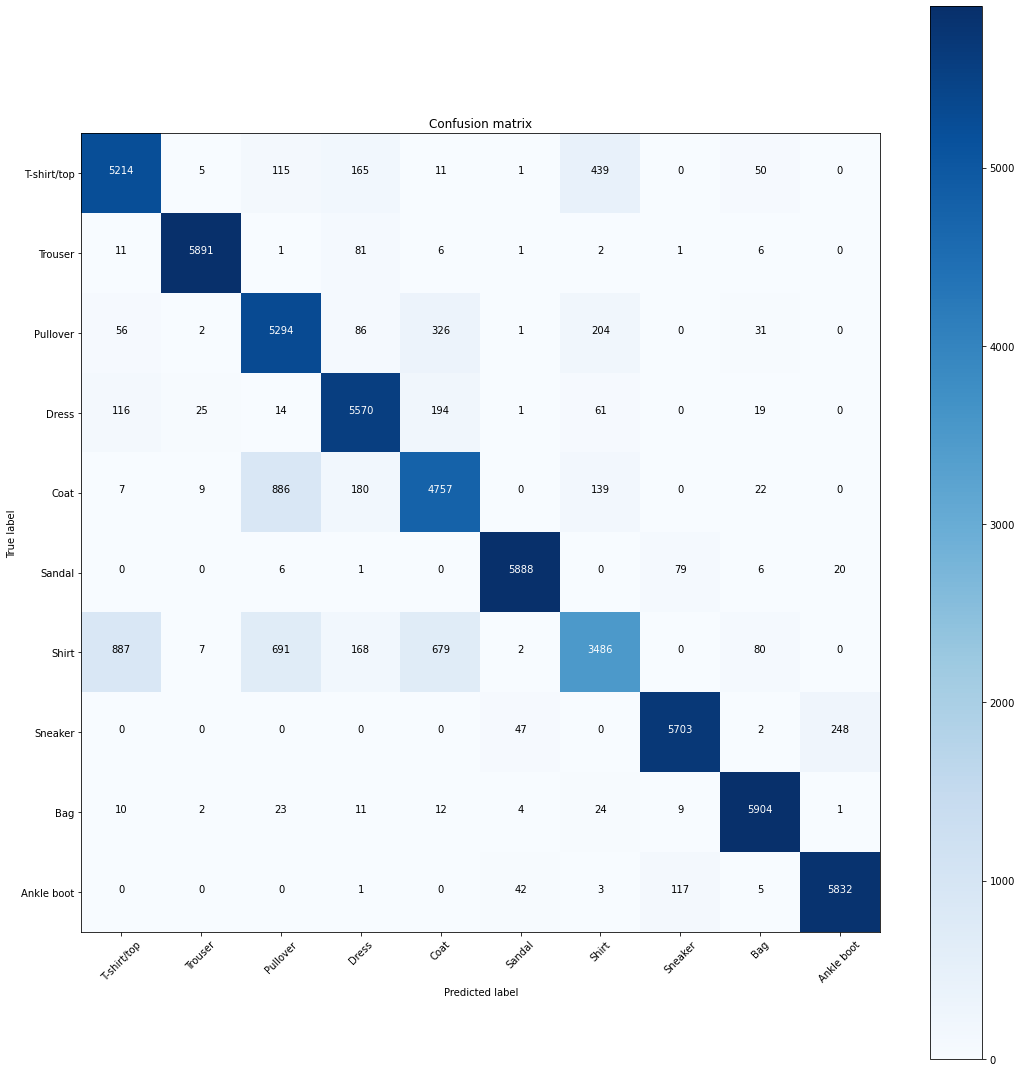

In [62]:
plot_confusion_matrix(
    cm=cm,
    classes=train_set.classes)

# Interpreting The Confusion Matrix
The confusion matrix has three axes:

    1.  Prediction label (class)
    2.  True label
    3.  Heat map value (color)

The prediction label and true labels show us which prediction class we are dealing with. The matrix diagonal represents
locations in the matrix where the prediction and the truth are the same, so this is where we want the heat map to be
darker.

Any values that are not on the diagonal are incorrect predictions because the prediction and the true label don't match.
To read the plot, we can use these steps:

    1.  Choose a prediction label on the horizontal axis.
    2.  Check the diagonal location for this label to see the total number correct.
    3.  Check the other non-diagonal locations to see where the network is confused.

In [63]:
from torch.utils.tensorboard import SummaryWriter